In [240]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

from hatespeech import HateSpeechClassifier

%matplotlib inline

In [241]:
csf = HateSpeechClassifier()
X, y = csf.build()
tweets = csf.df.tweet
feats_names = csf.feature_names

/usr/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3247235f8>]],
      dtype=object)

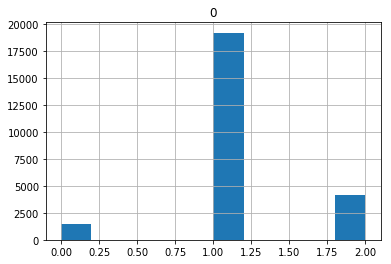

In [242]:
pd.DataFrame(y).hist()

In [243]:
X.shape, len(feats_names)

((24783, 11145), 11145)

In [244]:
data = pd.DataFrame(X, columns=feats_names)
data['class'] = y
data.describe()

ab          abil           abl           abo         abort  \
count  24783.000000  24783.000000  24783.000000  24783.000000  24783.000000   
mean       0.002918      0.002258      0.003240      0.007125      0.002961   
std        0.162368      0.145097      0.169970      0.239054      0.184221   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        9.038472      9.326154      8.920689      8.026871     18.344006   

               abov       absolut           abt           abu          abus  \
count  24783.000000  24783.000000  24783.000000  24783.000000  24783.000000   
mean       0.004180      0.008522      0.003600      0.002302      0.003870   
std        0.189924      0.258047      0.196267      0.170824      0.183675   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.633007      7.822076     17.841377     19.016951      8.720018   

           ...          num_words  num_unique_words     vader neg  \
count      ...       24783.000000      24783.000000  24783.000000   
mean       ...          13.592947         12.913933      0.228975   
std        ...           6.885442          6.281764      0.205714   
min        ...           1.000000          1.000000      0.000000   
25%        ...           8.000000          8.000000      0.000000   
50%        ...          13.000000         12.000000      0.219000   
75%        ...          19.000000         18.000000      0.368000   
max        ...          36.000000         33.000000      1.000000   

          vader pos     vader neu  vader compound  num_hashtags  num_mentions  \
count  24783.000000  24783.000000    24783.000000  24783.000000  24783.000000   
mean       0.094317      0.676709       -0.259380      0.778961      0.778195   
std        0.129019      0.214635        0.480408      2.006578      0.875600   
min        0.000000      0.000000       -0.992400      0.000000      0.000000   
25%        0.000000      0.526000       -0.659700      0.000000      0.000000   
50%        0.000000      0.674000       -0.340000      0.000000      1.000000   
75%        0.171000      0.828000        0.000000      1.000000      1.000000   
max        0.859000      1.000000        0.983400     77.000000     10.000000   

           num_urls    is_retweet  
count  24783.000000  24783.000000  
mean       0.124117      0.064924  
std        0.341150      0.246396  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        2.000000      1.000000  

[8 rows x 11145 columns]

In [245]:
# X = data.drop(['class'], axis=1)
# y = data['class']

In [246]:
def conf_matrix(matrix):
    matrix_proportions = np.zeros((3, 3))
    for i in range(0, 3):
        matrix_proportions[i, :] = matrix[i, :] / float(matrix[i, :].sum())
            
    return matrix_proportions


def run_tests(df_x, df_y):
    select_model = SelectFromModel(
        LogisticRegression(class_weight='balanced', penalty='l1', C=0.01)
    )
    LR = LogisticRegression(class_weight='balanced', penalty='l2')
    pipeline = Pipeline(steps=[
        ('select', select_model),
        ('model', LR)
    ])
    param_grid = [{}]
    
    for n in range(10):
        xtrain, xtest, ytrain, ytest = train_test_split(
            df_x, df_y, test_size=0.1
        )
        grid_search = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            cv=StratifiedKFold(n_splits=5, random_state=42).split(xtrain, ytrain),
            n_jobs=10
        )
        model = grid_search.fit(xtrain, ytrain)
        ypreds = model.predict(xtest)

        cm = confusion_matrix(ytest, ypreds)
        r = conf_matrix(cm)
        print(r[0][0], r[1][1], r[2][2])

### With KNeighborsClassifier

In [247]:
data.head()

ab  abil  abl  abo  abort  abov  absolut  abt  abu  abus     ...      \
0  0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       
1  0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       
2  0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       
3  0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       
4  0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       

   num_words  num_unique_words  vader neg  vader pos  vader neu  \
0       25.0              23.0      0.000      0.120      0.880   
1       16.0              16.0      0.237      0.000      0.763   
2       20.0              18.0      0.538      0.000      0.462   
3        8.0               8.0      0.000      0.344      0.656   
4       26.0              23.0      0.109      0.229      0.662   

   vader compound  num_hashtags  num_mentions  num_urls  is_retweet  
0          0.4563           0.0           1.0       0.0         0.0  
1         -0.6876           0.0           1.0       0.0         0.0  
2         -0.9550           0.0           2.0       0.0         1.0  
3          0.5673           0.0           2.0       0.0         0.0  
4          0.6331           1.0           1.0       0.0         0.0  

[5 rows x 11145 columns]

In [248]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=30, n_jobs=10)
neigh.fit(X, y)

neighbors_dists, neighbors_inds = neigh.kneighbors(return_distance=True)

In [249]:
# distancias
pd.DataFrame(neighbors_dists).head()

0          1          2          3          4          5   \
0  27.640261  27.710781  27.714766  28.137382  28.674772  28.828711   
1  26.698663  27.396966  27.554674  27.773551  27.798138  28.097770   
2  26.684979  26.772439  27.026730  27.931821  28.240324  28.272234   
3  19.553460  19.625525  19.700426  19.717835  19.805896  19.851059   
4  29.050151  29.459800  29.569980  30.043532  30.266585  30.361528   

          6          7          8          9     ...             20  \
0  28.849020  28.881103  28.927632  28.942723    ...      29.907977   
1  28.213678  28.237119  28.469243  28.477090    ...      28.983274   
2  28.289002  28.361763  28.464723  28.690148    ...      29.400311   
3  19.879718  20.093174  20.133100  20.226289    ...      20.996055   
4  30.702162  30.752190  31.051261  31.053600    ...      31.750321   

          21         22         23         24         25         26  \
0  29.917854  29.950038  30.003182  30.035275  30.035765  30.041387   
1  28.987311  29.049884  29.063627  29.106845  29.148320  29.183448   
2  29.402535  29.406961  29.414160  29.521957  29.527774  29.637646   
3  21.073588  21.128982  21.136079  21.181407  21.186716  21.201414   
4  31.781499  31.938916  31.994893  32.068508  32.079431  32.101415   

          27         28         29  
0  30.070417  30.081239  30.088282  
1  29.191004  29.226111  29.237514  
2  29.690583  29.712111  29.717642  
3  21.230250  21.282787  21.378969  
4  32.146139  32.172473  32.188563  

[5 rows x 30 columns]

In [267]:
# features com os vizinhos

size = len(neighbors_dists)
meta_names = [
    'min_dist_0', 'min_dist_1', 'min_dist_2', 
    'max_dist_0', 'max_dist_1', 'max_dist_2', 
    'mean_dist_0', 'mean_dist_1','mean_dist_2', 
    'quantile_inf_0', 'quantile_inf_1', 'quantile_inf_2', 
    'quantile_sup_0', 'quantile_sup_1', 'quantile_sup_2',
    'count_neighbors_0', 'count_neighbors_1', 'count_neighbors_2',
    'count_max_neighbors_0', 'count_max_neighbors_1', 'count_max_neighbors_2'
]
df_meta_features = pd.DataFrame(np.zeros((size, len(meta_names))), columns=meta_names)

for i, (dist, ind) in enumerate(zip(neighbors_dists, neighbors_inds)):
    df_neighbors = data.loc[ind]
    
    df_dist = pd.DataFrame(dist, index=ind)
    
    df_neighbors_0 = df_neighbors[df_neighbors['class']==0]
    df_neighbors_1 = df_neighbors[df_neighbors['class']==1]
    df_neighbors_2 = df_neighbors[df_neighbors['class']==2]
    
    ind_0 = df_neighbors_0.index.values.tolist()
    ind_1 = df_neighbors_1.index.values.tolist()
    ind_2 = df_neighbors_2.index.values.tolist()
    
    values0 = df_dist.loc[ind_0].values
    values1 = df_dist.loc[ind_1].values
    values2 = df_dist.loc[ind_2].values
    
    if not df_neighbors_0.empty:
        df_meta_features.loc[i, 'min_dist_0'] = np.min(values0)
        df_meta_features.loc[i, 'max_dist_0'] = np.max(values0)
        df_meta_features.loc[i, 'mean_dist_0'] = np.mean(values0)
        
        quantile0 = np.quantile(values0, [0.25, 0.75])
        
        df_meta_features.loc[i, 'quantile_inf_0'] = quantile0[0]
        df_meta_features.loc[i, 'quantile_sup_0'] = quantile0[1]
        
        df_meta_features.loc[i, 'count_neighbors_0'] = len(values0)
        
        max_dist0 = np.max([len(k) for k in (values0, values1, values2)])
        df_meta_features.loc[i, 'count_max_neighbors_0'] = len(values0) / max_dist0
        
    if not df_neighbors_1.empty:
        df_meta_features.loc[i, 'min_dist_1'] = np.min(values1)
        df_meta_features.loc[i, 'max_dist_1'] = np.max(values1)
        df_meta_features.loc[i, 'mean_dist_1'] = np.mean(values1)
        
        quantile1 = np.quantile(values1, [0.25, 0.75])
        
        df_meta_features.loc[i, 'quantile_inf_1'] = quantile1[0]
        df_meta_features.loc[i, 'quantile_sup_1'] = quantile1[1]
        
        df_meta_features.loc[i, 'count_neighbors_1'] = len(values1)
        
        max_dist1 = np.max([len(k) for k in (values0, values1, values2)])
        df_meta_features.loc[i, 'count_max_neighbors_1'] = len(values1) / max_dist1
        
    if not df_neighbors_2.empty:
        df_meta_features.loc[i, 'min_dist_2'] = np.min(values2)
        df_meta_features.loc[i, 'max_dist_2'] = np.max(values2)
        df_meta_features.loc[i, 'mean_dist_2'] = np.mean(values2)
        
        quantile2 = np.quantile(values2, [0.25, 0.75])
        
        df_meta_features.loc[i, 'quantile_inf_2'] = quantile2[0]
        df_meta_features.loc[i, 'quantile_sup_2'] = quantile2[1]
        
        df_meta_features.loc[i, 'count_neighbors_2'] = len(values2)
        
        max_dist2 = np.max([len(k) for k in (values0, values1, values2)])
        df_meta_features.loc[i, 'count_max_neighbors_2'] = len(values2) / max_dist2


df_meta_features.head()

min_dist_0  min_dist_1  min_dist_2  max_dist_0  max_dist_1  max_dist_2  \
0   28.674772   27.640261   27.710781   28.881103   30.081239   30.088282   
1   28.213678   26.698663   28.730637   28.983274   29.226111   29.237514   
2   28.240324   26.684979   28.690148   29.268264   29.717642   29.690583   
3   19.851059   19.553460   21.181407   21.230250   21.378969   21.181407   
4    0.000000   29.050151   29.459800    0.000000   32.188563   31.781499   

   mean_dist_0  mean_dist_1  mean_dist_2  quantile_inf_0  \
0    28.777937    29.573766    29.008027       28.726355   
1    28.598476    28.492176    28.920487       28.406077   
2    28.754294    28.788435    29.146988       28.497309   
3    20.540655    20.545429    21.181407       20.195857   
4     0.000000    31.377418    30.729172        0.000000   

           ...            quantile_inf_2  quantile_sup_0  quantile_sup_1  \
0          ...                 28.137382       28.829520       30.019228   
1          ...                 28.779793       28.790875       29.056756   
2          ...                 28.875190       29.011279       29.406961   
3          ...                 21.181407       20.885453       21.034822   
4          ...                 30.387986        0.000000       32.013297   

   quantile_sup_2  count_neighbors_0  count_neighbors_1  count_neighbors_2  \
0       29.917854                2.0               19.0                9.0   
1       28.987311                2.0               23.0                5.0   
2       29.375408                2.0               25.0                3.0   
3       21.181407                2.0               27.0                1.0   
4       31.059418                0.0               24.0                6.0   

   count_max_neighbors_0  count_max_neighbors_1  count_max_neighbors_2  
0               0.105263                    1.0               0.473684  
1               0.086957                    1.0               0.217391  
2               0.080000                    1.0               0.120000  
3               0.074074                    1.0               0.037037  
4               0.000000                    1.0               0.250000  

[5 rows x 21 columns]

In [268]:
df_meta_features

min_dist_0  min_dist_1  min_dist_2  max_dist_0  max_dist_1  max_dist_2  \
0       28.674772   27.640261   27.710781   28.881103   30.081239   30.088282   
1       28.213678   26.698663   28.730637   28.983274   29.226111   29.237514   
2       28.240324   26.684979   28.690148   29.268264   29.717642   29.690583   
3       19.851059   19.553460   21.181407   21.230250   21.378969   21.181407   
4        0.000000   29.050151   29.459800    0.000000   32.188563   31.781499   
5       30.451729   28.750545   31.001177   33.059578   33.303681   31.001177   
6       30.137374   27.904259   28.654236   30.137374   30.988661   31.012519   
7       28.150982   25.587106   26.633271   28.481931   28.652609   28.667782   
8        0.000000   25.138100   26.619998    0.000000   27.279643   26.749882   
9       18.126362   16.924045   18.438804   21.885682   22.502284   22.575026   
10      25.772800   24.449538   26.250675   27.550066   27.674090   27.606447   
11      23.229634   21.199173   22.136442   23.229634   23.279063   23.153602   
12       0.000000   19.258211   21.912038    0.000000   22.188865   21.912038   
13       0.000000    6.857385   25.451462    0.000000   25.633439   25.451462   
14       0.000000    9.634460   10.993724    0.000000   12.491879   12.093054   
15      13.229946   11.575461   13.899872   13.229946   14.960283   14.891473   
16      16.066541   13.480805   12.983989   16.345228   16.353061   15.912733   
17       0.000000   10.312840   12.139893    0.000000   13.195747   12.648992   
18       0.000000   15.940446   17.567054    0.000000   18.919773   18.551059   
19       0.000000   14.725676   15.787844    0.000000   17.042759   16.928126   
20      22.046630   19.847042   20.858369   22.046630   22.163395   21.553064   
21      16.270500    8.921320   15.463882   16.270500   16.324476   15.993350   
22       0.000000   18.039836   19.047877    0.000000   20.147708   19.900545   
23      29.186783   29.426320   31.975510   29.186783   32.149192   31.975510   
24      24.717713   22.131186   23.344016   24.717713   24.988599   25.056255   
25       0.000000   18.148640   20.517117    0.000000   21.004907   20.813495   
26       0.000000   12.693234   15.348381    0.000000   15.473486   15.447932   
27      25.587382   22.646013   25.810146   25.587382   26.841145   26.589985   
28       0.000000   11.562776   15.704225    0.000000   16.618394   15.704225   
29       0.000000   20.934508    0.000000    0.000000   23.101715    0.000000   
...           ...         ...         ...         ...         ...         ...   
24753   17.104416   14.949566   15.693660   17.104416   17.262783   17.216706   
24754   18.295156   17.210439   19.849012   18.295156   19.958670   19.849012   
24755   17.682401   14.970993   16.876078   17.682401   18.155060   17.145256   
24756   30.148872   27.699239   27.775517   31.176755   31.224428   31.245876   
24757   24.999167   23.405825   24.334946   25.938538   26.094098   26.053840   
24758    0.000000   30.742306   32.210923    0.000000   33.748047   33.432581   
24759   16.381160   14.776087   16.243843   16.381160   16.843991   16.427527   
24760   15.446970   13.909726   15.031873   15.446970   16.154457   16.153888   
24761   13.460044   13.569626   13.756698   15.407474   15.654384   15.567177   
24762    0.000000    5.567764   22.576181    0.000000   23.577765   23.350040   
24763   21.619249   20.779140   20.844374   22.896587   22.995170   22.340943   
24764   19.292979   16.425975   19.439532   20.314641   20.586341   20.276005   
24765   12.058387   10.227976   11.141008   12.587652   12.046923   12.005085   
24766   14.466490   10.352377   12.922515   14.466490   14.598812   14.578470   
24767    0.000000   33.817498   28.858793    0.000000   35.873561   35.855399   
24768   27.096332   24.673123   26.620312   27.096332   28.172290   27.635473   
24769   37.534007   36.857640   39.686119   40.802330   40.671121   40.664169   
24770    0.000000   18.884751   20.501

In [269]:
new_data = pd.concat([data, df_meta_features], axis=1)
new_data.shape, data.shape

((24783, 11166), (24783, 11145))

In [272]:
new_X = new_data.drop(['class'], axis=1)
run_tests(new_X, y)

0.58 0.9046121593291404 0.9477434679334917
0.5984251968503937 0.9072642967542504 0.9391727493917275
0.48739495798319327 0.9079151577858251 0.9344262295081968
0.5964912280701754 0.9013292433537833 0.9486552567237164
0.588957055214724 0.9028815368196371 0.9457013574660633
0.5934959349593496 0.8954918032786885 0.9579207920792079
0.49295774647887325 0.9094221759500261 0.9567307692307693
0.5633802816901409 0.9038662486938349 0.9385342789598109
0.5107913669064749 0.8901673640167364 0.9228971962616822
0.5407407407407407 0.8982254697286013 0.9509345794392523


In [271]:
old_X = data.drop(['class'], axis=1)
run_tests(old_X, y)

0.5584415584415584 0.8947092718700891 0.9495192307692307
0.5240963855421686 0.8906666666666667 0.9406392694063926
0.5891472868217055 0.9061522419186653 0.9467592592592593
0.6413793103448275 0.8998968008255934 0.9393939393939394
0.647887323943662 0.9135477069056405 0.9568181818181818
0.5149253731343284 0.905888538380652 0.9525959367945824
0.5503355704697986 0.9111343439623628 0.9304556354916067
0.5306122448979592 0.908237747653806 0.9541062801932367
0.5625 0.9029227557411273 0.9287356321839081
0.5684931506849316 0.9014084507042254 0.9567307692307693
